## MCSD 2213 Advanced Analytics For Data Science
## Alternative Assessment
Name: Tan Boon Chu

Matric no.: MCS211006

Colab link: https://colab.research.google.com/drive/1sCN30K-DmJcBwEiXt8t0AldAE5Uh4L2c#scrollTo=SnWoRxAbHy9J

For Jupyter view: Search keyword 'Alternative Assessment' to skip group project part.

## Unsupervised Learning - Agglomerative Clustering & DBSCAN

## Optimization - Silhouette Method

This project shows the analysis of customers segmentation on customer personality analysis dataset using **agglomerative clustering and DBSCAN**, with **Silhouette method as the optimization method**. There will be some further discussions about the performance and suggestions.


# **Group Project Part (Data Import to K-Means Clustering)**

## Data Import

In this section, data will be imported via Google Drive API

Import libraries

In [ ]:
#Importing the Libraries
import numpy as np
import pandas as pd
import datetime
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics

In [ ]:
# Import PyDrive and associated libraries
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [ ]:
file_id = '1a8nEJHkqe4iW5eZF4GFES-Oxkvi1OJ9T' 
downloaded = drive.CreateFile({'id': file_id})

# Save file in Colab memory
downloaded.GetContentFile('marketing_campaign.csv')  

In [ ]:
#read the file
df = pd.read_csv("marketing_campaign.csv",sep="\t")

# View first 5 rows
print(df.head())

     ID  Year_Birth   Education Marital_Status   Income  Kidhome  Teenhome  \
0  5524        1957  Graduation         Single  58138.0        0         0   
1  2174        1954  Graduation         Single  46344.0        1         1   
2  4141        1965  Graduation       Together  71613.0        0         0   
3  6182        1984  Graduation       Together  26646.0        1         0   
4  5324        1981         PhD        Married  58293.0        1         0   

  Dt_Customer  Recency  MntWines  ...  NumWebVisitsMonth  AcceptedCmp3  \
0  04-09-2012       58       635  ...                  7             0   
1  08-03-2014       38        11  ...                  5             0   
2  21-08-2013       26       426  ...                  4             0   
3  10-02-2014       26        11  ...                  6             0   
4  19-01-2014       94       173  ...                  5             0   

   AcceptedCmp4  AcceptedCmp5  AcceptedCmp1  AcceptedCmp2  Complain  \
0             0

## Pre-Analytics Data 

**Data Overview**

In [ ]:
print(df.shape)

(2240, 29)


There are 2240 rows and 29 columns of data

In [ ]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [ ]:
# Data Types
print(df.dtypes)

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object


**Data Cleaning**

Duplicated Data

In [ ]:
df[df.duplicated(keep=False)]

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response


No duplicated data found

Missing Values

In [ ]:
df.isnull().sum()

ID                      0
Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

**From the above output, the conclusions are:**

* There are missing values in income column
* Dt_Customer that indicates the date a customer joined the database is not parsed as DateTime
* There are some categorical features in our data frame; as there are some features in dtype: object). So we will need to encode them into numeric forms later. 

In [ ]:
#To fill the NA values with average 
df['Income']=df['Income'].fillna(df['Income'].mean())

In [ ]:
df.isnull().sum()

ID                     0
Year_Birth             0
Education              0
Marital_Status         0
Income                 0
Kidhome                0
Teenhome               0
Dt_Customer            0
Recency                0
MntWines               0
MntFruits              0
MntMeatProducts        0
MntFishProducts        0
MntSweetProducts       0
MntGoldProds           0
NumDealsPurchases      0
NumWebPurchases        0
NumCatalogPurchases    0
NumStorePurchases      0
NumWebVisitsMonth      0
AcceptedCmp3           0
AcceptedCmp4           0
AcceptedCmp5           0
AcceptedCmp1           0
AcceptedCmp2           0
Complain               0
Z_CostContact          0
Z_Revenue              0
Response               0
dtype: int64

## Features Selection and Feature Engineering

Feature filtering method instead of wrapper and embedded will be applied. 

The features deleted are not applicable in this study.

In [ ]:
# creating a subset of dfframe by dropping the features on deals accepted and promotions
cols_del = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1','AcceptedCmp2', 'Complain', 'Response']
df = df.drop(cols_del, axis=1)

Next, a feature is created out of "Dt_Customer" that indicates the number of days a customer is registered in the firm's database. This value is related to the most recent customer in the record.

Thus the newest and oldest recorded dates must be checked. 

In [ ]:
df["Dt_Customer"] = pd.to_datetime(df["Dt_Customer"])
dates = []
#change format to date
for i in df["Dt_Customer"]:
    i = i.date()
    dates.append(i)  
#Dates of the newest and oldest recorded customer
print("The newest customer's enrolment date in the records:",max(dates))
print("The oldest customer's enrolment date in the records:",min(dates))


The newest customer's enrolment date in the records: 2014-12-06
The oldest customer's enrolment date in the records: 2012-01-08


Creating a feature **("Customer_For")** of the number of days the customers started to shop in the store relative to the last recorded date

In [ ]:
#Created a feature "Customer_For"
days = []
d1 = max(dates) #taking it to be the newest customer
#Calculate the period of 
for i in dates:
    delta = d1 - i
    days.append(delta.days)
#add new column "Customer_For"
df["Customer_For"] = days
#df["Customer_For"] = pd.to_numeric(df["Customer_For"], errors="coerce") #errors with"coerce" to replace invalid with NaN

In [ ]:
df["Customer_For"].head()

0    971
1    125
2    472
3     65
4    321
Name: Customer_For, dtype: int64

In [ ]:
df["ID"].value_counts()

5524    1
6885    1
3478    1
7494    1
1763    1
       ..
5682    1
5564    1
6516    1
6255    1
9405    1
Name: ID, Length: 2240, dtype: int64

In [ ]:
df.shape
#Each customer record are unique

(2240, 23)

In [ ]:
df

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Z_CostContact,Z_Revenue,Customer_For
0,5524,1957,Graduation,Single,58138.0,0,0,2012-04-09,58,635,...,88,88,3,8,10,4,7,3,11,971
1,2174,1954,Graduation,Single,46344.0,1,1,2014-08-03,38,11,...,1,6,2,1,1,2,5,3,11,125
2,4141,1965,Graduation,Together,71613.0,0,0,2013-08-21,26,426,...,21,42,1,8,2,10,4,3,11,472
3,6182,1984,Graduation,Together,26646.0,1,0,2014-10-02,26,11,...,3,5,2,2,0,4,6,3,11,65
4,5324,1981,PhD,Married,58293.0,1,0,2014-01-19,94,173,...,27,15,5,5,3,6,5,3,11,321
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870,1967,Graduation,Married,61223.0,0,1,2013-06-13,46,709,...,118,247,2,9,3,4,5,3,11,541
2236,4001,1946,PhD,Together,64014.0,2,1,2014-10-06,56,406,...,0,8,7,8,2,5,7,3,11,61
2237,7270,1981,Graduation,Divorced,56981.0,0,0,2014-01-25,91,908,...,12,24,1,2,3,13,6,3,11,315
2238,8235,1956,Master,Together,69245.0,0,1,2014-01-24,8,428,...,30,61,2,6,5,10,3,3,11,316


Exploring the unique values in the categorical features to get a clear idea of the data.  

In [ ]:
print("Total categories in the feature Marital_Status:\n", df["Marital_Status"].value_counts(), "\n")
print("Total categories in the feature Education:\n", df["Education"].value_counts())

Total categories in the feature Marital_Status:
 Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64 

Total categories in the feature Education:
 Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64


**to engineer some new features:**

* Extract the **"Age"** of a customer by the **"Year_Birth"** indicating the birth year of the respective person.
* Create another feature **"Spent"** indicating the total amount spent by the customer in various categories over the span of two years.
* Create another feature **"Living_With"** out of **"Marital_Status"** to extract the living situation of couples.
* Create a feature **"Children"** to indicate total children in a household that is, kids and teenagers.
* To get further clarity of household, Creating feature indicating **"Family_Size"**
* Create a feature **"Is_Parent"** to indicate parenthood status
* Lastly, create three categories in the **"Education"** by simplifying its value counts.
* Dropping some of the redundant features

In [ ]:
#Feature Engineering
#Age of customer today 
df["Age"] = 2021-df["Year_Birth"]

#Total spendings on various items
df["Spent"] = df["MntWines"]+ df["MntFruits"]+ df["MntMeatProducts"]+ df["MntFishProducts"]+ df["MntSweetProducts"]+ df["MntGoldProds"]

#Deriving living situation by marital status"Alone"
df["Living_With"]=df["Marital_Status"].replace({"Married":"Partner", "Together":"Partner", "Absurd":"Alone", "Widow":"Alone", "YOLO":"Alone", "Divorced":"Alone", "Single":"Alone",})

#Feature indicating total children living in the household
df["Children"]=df["Kidhome"]+df["Teenhome"]

#Feature for total members in the householde
df["Family_Size"] = df["Living_With"].replace({"Alone": 1, "Partner":2})+ df["Children"]

#Feature pertaining parenthood
df["Is_Parent"] = np.where(df.Children> 0, 1, 0)

#Segmenting education levels in three groups
df["Education"]=df["Education"].replace({"Basic":"Undergraduate","2n Cycle":"Undergraduate", "Graduation":"Graduate", "Master":"Postgraduate", "PhD":"Postgraduate"})

#For clarity
df=df.rename(columns={"MntWines": "Wines","MntFruits":"Fruits","MntMeatProducts":"Meat","MntFishProducts":"Fish","MntSweetProducts":"Sweets","MntGoldProds":"Gold"})

# Total purchase
df["PurchaseNum"] = df["NumWebPurchases"] + df["NumCatalogPurchases"] + df["NumStorePurchases"]

#Dropping some of the redundant features
to_drop = ["Marital_Status", "Dt_Customer", "Z_CostContact", "Z_Revenue", "Year_Birth", "ID"]
df = df.drop(to_drop, axis=1)

In [ ]:
df.describe()

,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,Gold,...,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Children,Family_Size,Is_Parent,PurchaseNum
count,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000
mean,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,...,2.662054,5.790179,5.316518,512.043304,52.194196,605.798214,0.950446,2.595089,0.715179,12.537054
std,25037.797168,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,...,2.923101,3.250958,2.426645,232.229893,11.984069,602.249288,0.751803,0.906959,0.451430,7.205741
min,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,25.000000,5.000000,0.000000,1.000000,0.000000,0.000000
25%,35538.750000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,...,0.000000,3.000000,3.000000,340.750000,44.000000,68.750000,0.000000,2.000000,0.000000,6.000000
50%,51741.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,...,2.000000,5.000000,6.000000,513.000000,51.000000,396.000000,1.000000,3.000000,1.000000,12.000000
75%,68289.750000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,...,4.000000,8.000000,7.000000,685.250000,62.000000,1045.500000,1.000000,3.000000,1.000000,18.000000
max,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,...,28.000000,13.000000,20.000000,1063.000000,128.000000,2525.000000,3.000000,5.000000,1.000000,32.000000


The above stats show some discrepancies in mean Income and Age and max Income and age.

Do note that  max-age is 128 years, As the calculated the age that would be this year 2021 and the data is old.


Remove Outliers

In [ ]:
#Dropping the outliers by setting a cap on Age and income. 
df = df[(df["Age"]<90)]
df = df[(df["Income"]<600000)]
print("The total number of data-points after removing the outliers are:", len(df))

The total number of data-points after removing the outliers are: 2236


In [ ]:
df.shape

(2236, 24)

## Exploratory Data Analysis

Relative Plot Of Some Selected Features: A data Subset


<Figure size 432x288 with 0 Axes>

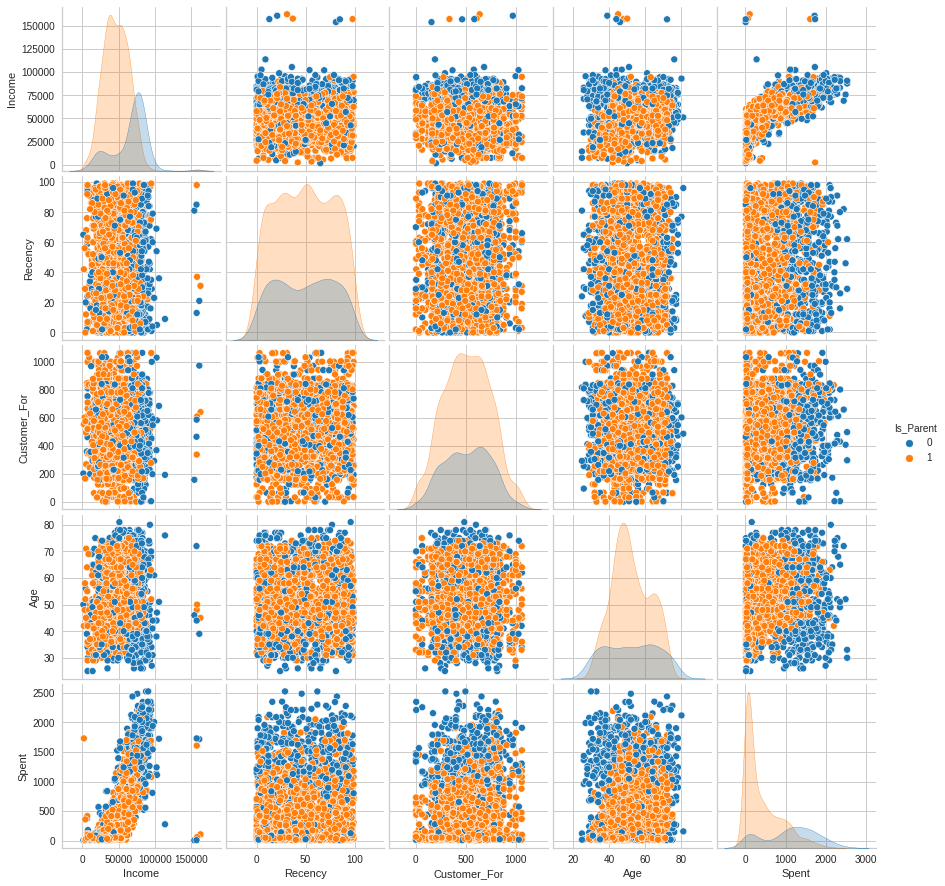

In [ ]:
#To plot some selected features 
#Setting up colors prefrences
cmap = 'jet'
#Plotting following features
To_Plot = [ "Income", "Recency", "Customer_For", "Age", "Spent", "Is_Parent"]
print("Relative Plot Of Some Selected Features: A data Subset")
plt.figure()
#view the by group of is parent or is not parent
sns.pairplot(df[To_Plot], hue= "Is_Parent",palette= 'tab10')
#Taking hue 
plt.show()

Correlation of the features

* Income and speading are positively correlated and if customer is parent income tend to more and spent more

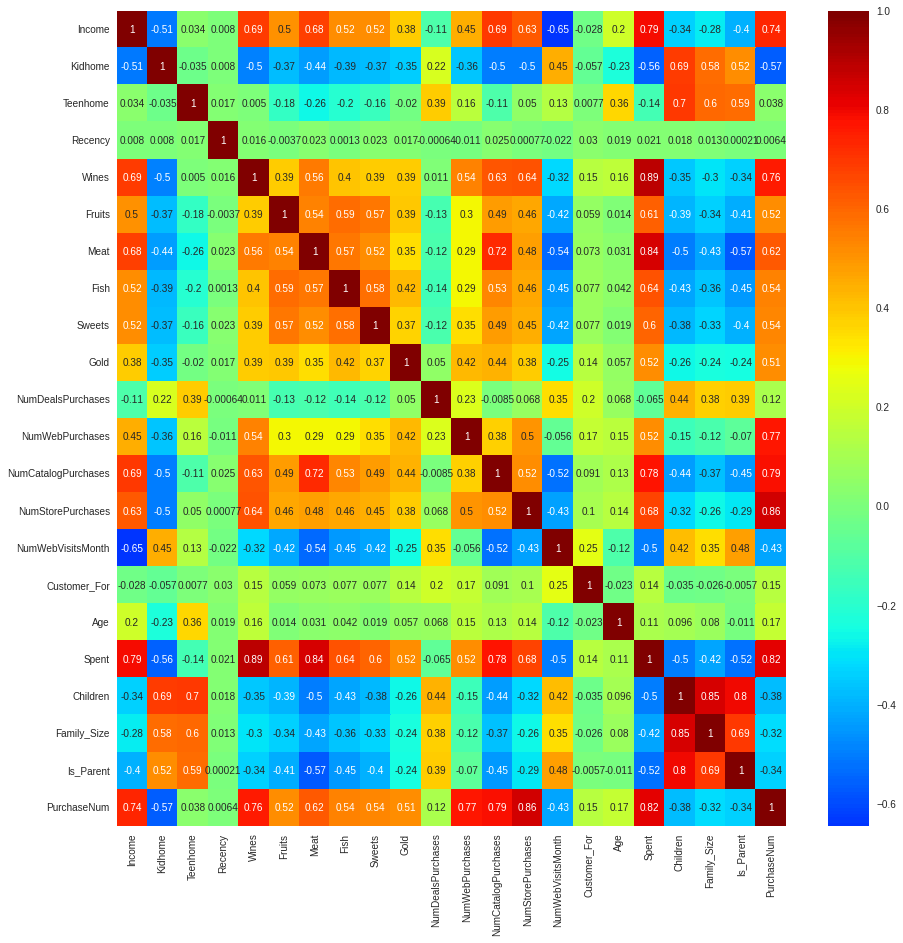

In [ ]:
#correlation matrix
plt.figure(figsize=(15,15))  
sns.heatmap(df.corr(),annot=True, cmap=cmap, center=0)

## Data Pre-processing for Clustering

**The following steps are applied to preprocess the data:**

* Label encoding the categorical features
* Scaling the features using the standard scaler 
* Creating a subset dataframe for dimensionality reduction

In [ ]:
#Get list of categorical variables. check which column data type are object
s = (df.dtypes == 'object')
object_cols = list(s[s].index)

print("Categorical variables in the dataset:", object_cols)

Categorical variables in the dataset: ['Education', 'Living_With']


In [ ]:
#Label Encoding the object dtypes. function to ensure all columns are numerical
LE=LabelEncoder()
for i in object_cols:
    df[i]=df[[i]].apply(LE.fit_transform)
    
print("All features are now numerical")

All features are now numerical


In [ ]:
#Creating a copy of df
ds = df.copy()

#Scaling
scaler = StandardScaler()
scaler.fit(ds)
scaled_ds = pd.DataFrame(scaler.transform(ds),columns= ds.columns )
print("All features are now scaled")

All features are now scaled


In [ ]:
#Scaled data to be used for reducing the dimensionality
print("dataframe to be used for further modelling:")
scaled_ds.head()

dataframe to be used for further modelling:


,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumStorePurchases,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,PurchaseNum
0,-0.89438,0.288513,-0.824939,-0.930615,0.306856,0.983228,1.554170,1.679746,2.461068,1.475396,...,-0.552429,0.692865,1.975467,1.016868,1.680176,-1.347635,-1.264308,-1.758810,-1.584362,1.312080
1,-0.89438,-0.262438,1.032627,0.905974,-0.383971,-0.871064,-0.636431,-0.713455,-0.650414,-0.631638,...,-1.167738,-0.131421,-1.667017,1.273264,-0.962202,-1.347635,1.395139,0.445618,0.631169,-1.186198
2,-0.89438,0.917992,-0.824939,-0.930615,-0.798467,0.362159,0.572177,-0.177201,1.344595,-0.147262,...,1.293496,-0.543564,-0.172996,0.333146,0.282541,0.742041,-1.264308,-0.656596,-1.584362,1.034493
3,-0.89438,-1.182621,1.032627,-0.930615,-0.798467,-0.871064,-0.560893,-0.651409,-0.503991,-0.583200,...,-0.552429,0.280722,-1.925349,-1.290693,-0.918994,0.742041,0.065416,0.445618,0.631169,-0.908611
4,0.57070,0.295754,1.032627,-0.930615,1.550344,-0.389661,0.421101,-0.217088,0.154911,-0.001950,...,0.062879,-0.131421,-0.823131,-1.034298,-0.305762,0.742041,0.065416,0.445618,0.631169,0.201734


## Dimensionality Reduction
*Dimensionality reduction is the process of reducing the number of random variables under consideration, by obtaining a set of principal variables.* 

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

Reduce the dimensions to 2.

In [ ]:
#Initiating PCA to reduce dimensions of features to 2 for analysis later
pca = PCA(n_components=2)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,-8.738786e-17,2.993315,-6.113107,-2.725548,-0.769396,2.631418,7.671794
col2,2236.0,3.713984e-17,1.756032,-4.351299,-1.362756,-0.204984,1.295667,6.166989


In [ ]:
PCA_ds

,col1,col2
0,5.149295,-0.342292
1,-3.104979,-0.023289
2,2.792367,-0.715755
3,-2.861398,-1.422178
4,-0.541199,0.326792
...,...,...
2231,2.424944,2.203662
2232,-2.735002,4.263695
2233,2.740262,-1.862294
2234,1.828047,1.746515


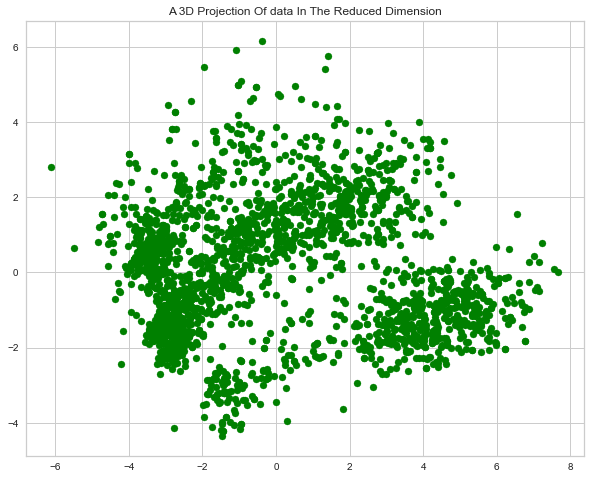

In [ ]:
#A Projection Of data In The Reduced Dimension. Overview data trend
x =PCA_ds["col1"]
y =PCA_ds["col2"]

#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111)
ax.scatter(x,y, c="green", marker="o" )
ax.set_title("A 3D Projection Of data In The Reduced Dimension")
plt.show()

## K-Means Method

In [ ]:
from sklearn.cluster import KMeans
X=PCA_ds.iloc[:,[0,1]].values

#Predit the cluster of each row of data with 2 cluster
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
#create a new column and label cluster
df['Clusters']=y_kmeans

In [ ]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,PurchaseNum,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,7,971,64,1617,0,0,1,0,22,0
1,0,46344.0,1,1,38,11,1,6,2,1,...,5,125,67,27,0,2,3,1,4,1
2,0,71613.0,0,0,26,426,49,127,111,21,...,4,472,56,776,1,0,2,0,20,0
3,0,26646.0,1,0,26,11,4,20,10,3,...,6,65,37,53,1,1,3,1,6,1
4,1,58293.0,1,0,94,173,43,118,46,27,...,5,321,40,422,1,1,3,1,14,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,5,541,54,1341,1,1,3,1,16,0
2236,1,64014.0,2,1,56,406,0,30,0,0,...,7,61,75,444,1,3,5,1,15,1
2237,0,56981.0,0,0,91,908,48,217,32,12,...,6,315,40,1241,0,0,1,0,18,0
2238,1,69245.0,0,1,8,428,30,214,80,30,...,3,316,65,843,1,1,3,1,21,0


## Model Evaluation

Since this is an unsupervised clustering. We do not have a tagged feature to evaluate or score our model. The purpose of this section is to study the patterns in the clusters formed and determine the nature of the clusters' patterns. 

For that, we will be having a look at the data in light of clusters via exploratory data analysis and drawing conclusions. 

**Firstly, let us have a look at the group distribution of clustring**

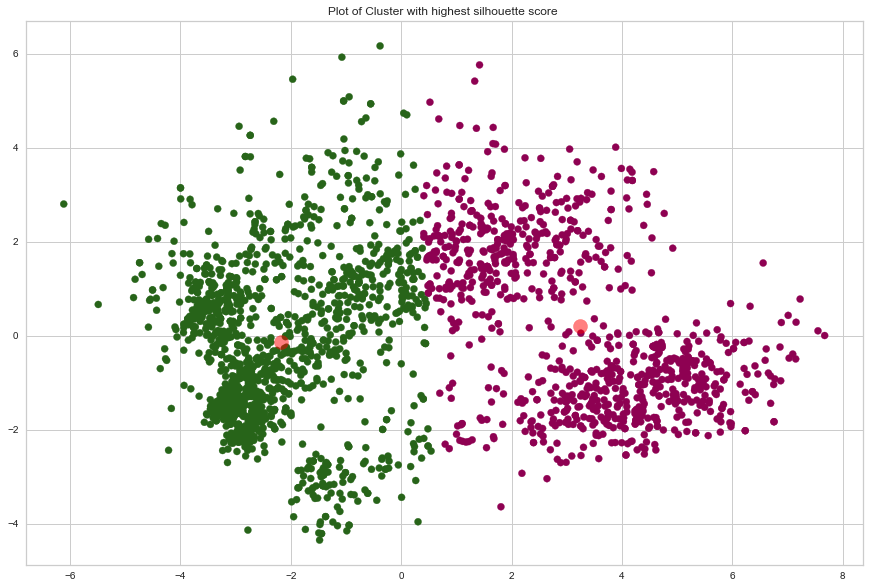

In [ ]:
#Plotting the clusters
plt.figure(figsize=(15,10))
plt.title('Plot of Cluster')
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

From the clustering distribution, it shows that the lower part can be further clustered as there are some clear distances within the clusters.

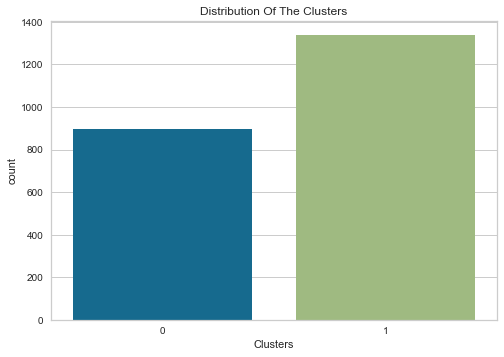

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

* The cluster 1 distributed more than cluster 0

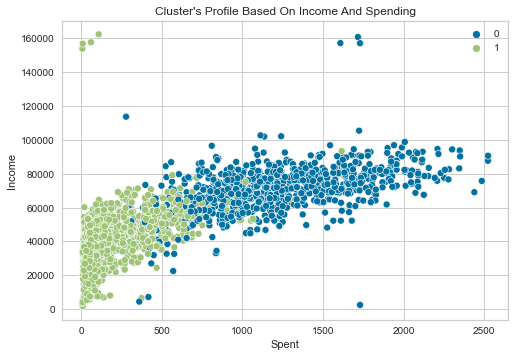

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

The above plot shows the clustering results without optimized number of clusters.

## Optimization - Elbow Method

Elbow method is used as the optimization method to determine the optimal number of clusters in the k-means model

Elbow Method to determine the number of clusters to be formed:


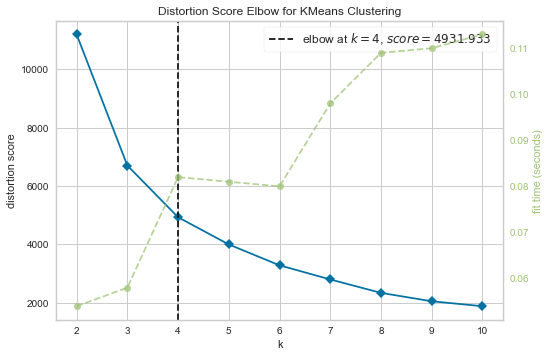

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

The above cell indicates that four will be an optimal number of clusters for this data. 
Next, we will be fitting the K-means Clustering Model to get the final clusters. 

In [ ]:
#Predit the cluster of each row of data with 4 cluster
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans= kmeans.predict(X)
#create a new column and label cluster
df['Clusters']=y_kmeans

To examine the 4 clusters formed let's have a look at the plot distribution of the clusters. 

In [ ]:
df

,Education,Income,Kidhome,Teenhome,Recency,Wines,Fruits,Meat,Fish,Sweets,...,NumWebVisitsMonth,Customer_For,Age,Spent,Living_With,Children,Family_Size,Is_Parent,PurchaseNum,Clusters
0,0,58138.0,0,0,58,635,88,546,172,88,...,7,971,64,1617,0,0,1,0,22,1
1,0,46344.0,1,1,38,11,1,6,2,1,...,5,125,67,27,0,2,3,1,4,2
2,0,71613.0,0,0,26,426,49,127,111,21,...,4,472,56,776,1,0,2,0,20,1
3,0,26646.0,1,0,26,11,4,20,10,3,...,6,65,37,53,1,1,3,1,6,0
4,1,58293.0,1,0,94,173,43,118,46,27,...,5,321,40,422,1,1,3,1,14,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,0,61223.0,0,1,46,709,43,182,42,118,...,5,541,54,1341,1,1,3,1,16,3
2236,1,64014.0,2,1,56,406,0,30,0,0,...,7,61,75,444,1,3,5,1,15,2
2237,0,56981.0,0,0,91,908,48,217,32,12,...,6,315,40,1241,0,0,1,0,18,1
2238,1,69245.0,0,1,8,428,30,214,80,30,...,3,316,65,843,1,1,3,1,21,3


## Model Evaluation

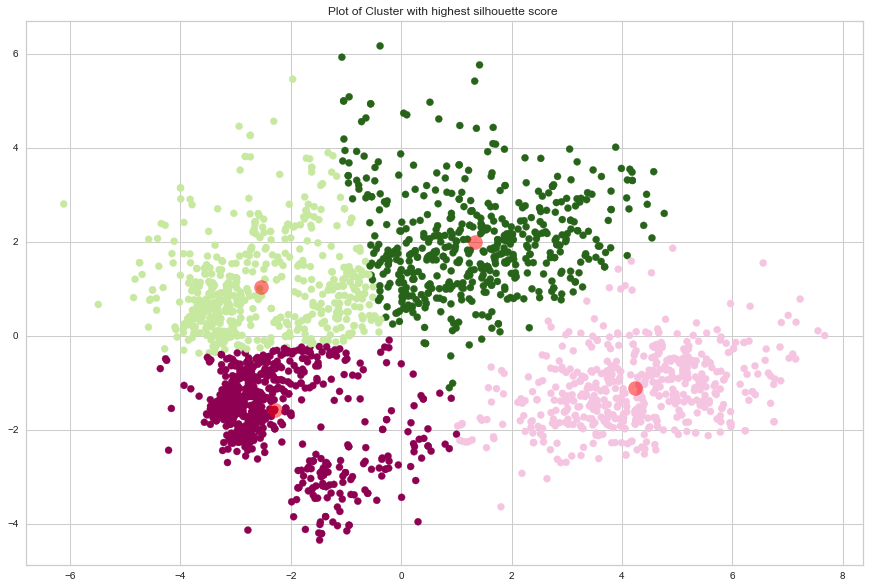

In [ ]:
#Plotting the clusters
plt.figure(figsize=(15,10))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='PiYG')

centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.5)

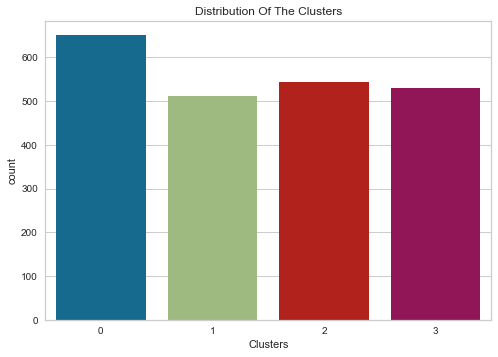

In [ ]:
#Plotting countplot of clusters
pl = sns.countplot(x=df["Clusters"])
pl.set_title("Distribution Of The Clusters")
plt.show()

The clusters seem to be fairly distributed.


From the above plot, it can be clearly seen that cluster 1 is our biggest set of customers closely followed by cluster 2.
We can explore what each cluster is spending on for the targeted marketing strategies.


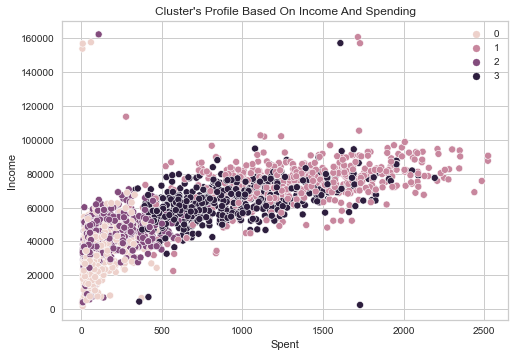

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

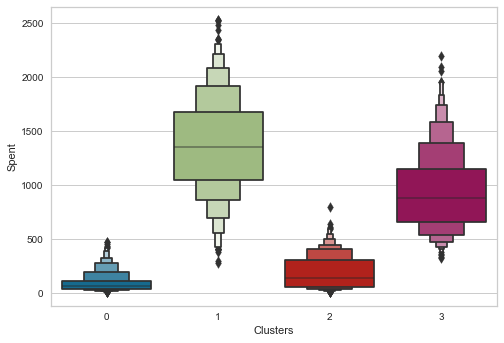

In [ ]:
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

**Income vs  spending plot shows the clusters pattern**
* group 0: low spending & low income 
* group 1: high spending & high income 
* group 2: low spending & average income 
* group 3: average spending & average income 

The detailed distribution of clusters as per the various products: Wines, Fruits, Meat, Fish, Sweets and Gold.

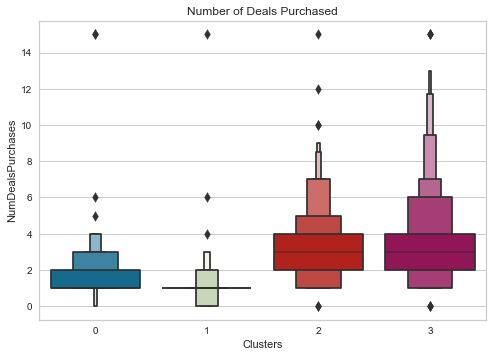

In [ ]:
#Plotting the number of deals purchased

pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

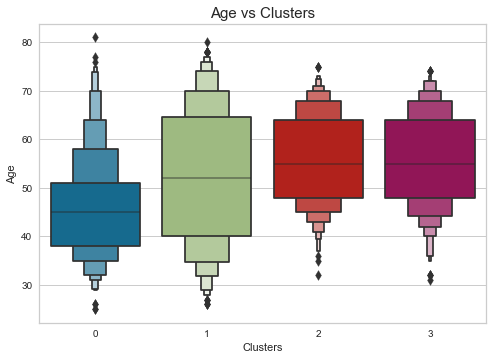

In [ ]:
sns.boxenplot(x=df["Clusters"], y=df["Age"])
plt.title("Age vs Clusters", size=15)
plt.show()

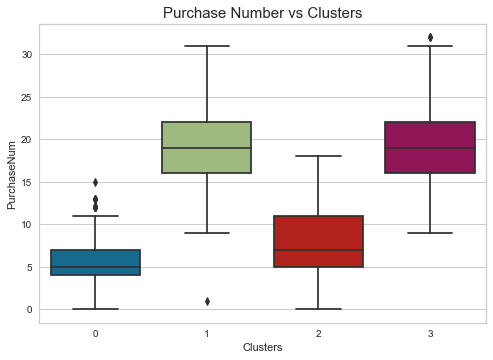

In [ ]:
sns.boxplot(x=df["Clusters"], y=df["PurchaseNum"])
plt.title("Purchase Number vs Clusters", size=15)
plt.show()

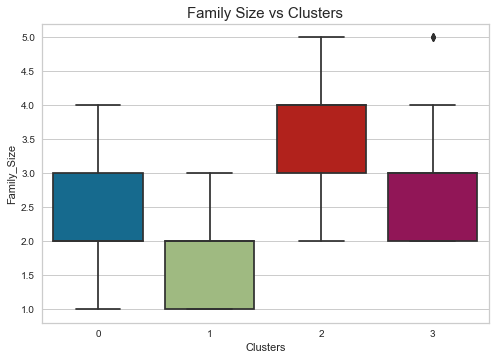

In [ ]:
sns.boxplot(x=df["Clusters"], y=df["Family_Size"])
plt.title("Family Size vs Clusters", size=15)
plt.show()

**Conclusion**

Cluster 0:

    Is youngest cluster
    Has low spending and low income
    Tendency to spend less
    Has least purchase number
    
Cluster 1:

    Is younger cluster
    Has high spending and high income
    Tendency to spend more
    Has high purchase number
    Has smallest size of family

Cluster 2:

    Is older cluster
    Has low spending and average income
    Has less purchase number
    Has biggest size of family
    

Cluster 3:

    Is older cluster
    Has average spending and average income
    Has high purchase number


**Marketing Suggestions**

Cluster 0 makes the least money and spends least money. So, you should gather the information about the its location and increase the discount rates at shops located at those locations. Also, this is the youngest cluster and that's why the shops situated at those locations should include the goods, clothes etc. suitable for the young people.

Cluster 2 is the second oldest cluster and people in that cluster have highest children number. It can also be observed that they spend the least money. Meaning that you need to consider discounting. In addition to that, if you make the discounts with a slogan like "Make Your Child Happy" in shops at those locations where these people live, because it could remind them that they are parents, it would possibly increase the number of sales.

Cluster 1 and 3 has higher spending and income, and thus, providing them referral code that benefits more to new customer they reffered, while benefit them some discount to keep this group of customer.


# **Alternative Assessment**

Unsupervised ML - Agglomerative Hierachical Clustering & DBSCAN

Optimization - Silhouette Method

## Unsupervised Learning Model

### Dimensionality Reduction

**Principal component analysis (PCA)** is a technique for reducing the dimensionality of such datasets, increasing interpretability but at the same time minimizing information loss.

**Steps in this section:**
* Dimensionality reduction with PCA
* Plotting the reduced dataframe

**Dimensionality reduction with PCA**

Reduce the dimensions to 3.

In [ ]:
#Initiating PCA to reduce dimentions aka features to 3
pca = PCA(n_components=3)
pca.fit(scaled_ds)
PCA_ds = pd.DataFrame(pca.transform(scaled_ds), columns=(["col1","col2", "col3"]))
PCA_ds.describe().T

,count,mean,std,min,25%,50%,75%,max
col1,2236.0,1.207541e-16,2.993315,-6.113107,-2.725548,-0.769396,2.631418,7.671794
col2,2236.0,2.542192e-17,1.756032,-4.351332,-1.362775,-0.204970,1.295677,6.167126
col3,2236.0,-2.780523e-17,1.224079,-3.565738,-0.828216,-0.024000,0.823724,6.496276


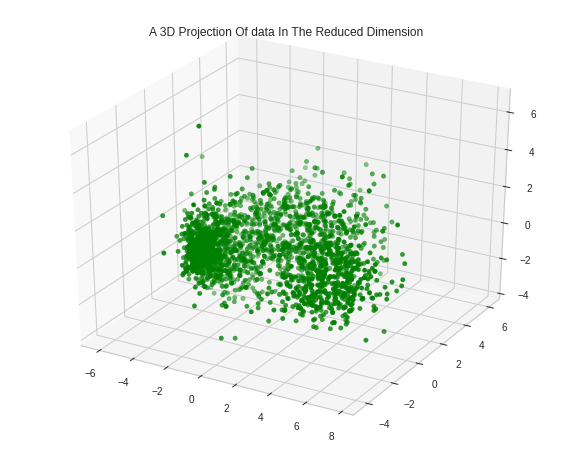

In [ ]:
#A 3D Projection Of data In The Reduced Dimension
x =PCA_ds["col1"]
y =PCA_ds["col2"]
z =PCA_ds["col3"]
#To plot
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(x,y,z, c="green")
ax.set_title("A 3D Projection Of data In The Reduced Dimension")
plt.show()

Save a copy of dataset

In [ ]:
PCA_df = PCA_ds.copy()
df1 = df.copy()

### Agglomerative Clustering
Agglomerative clustering is a hierarchical clustering method.  It involves merging examples until the desired number of clusters is achieved.

**Steps involved in the Clustering**
* Clustering via Agglomerative Clustering
* Visualize the clusters formed via scatter plot

Using elbow method to determine number of clusters

Elbow Method to determine the number of clusters to be formed:


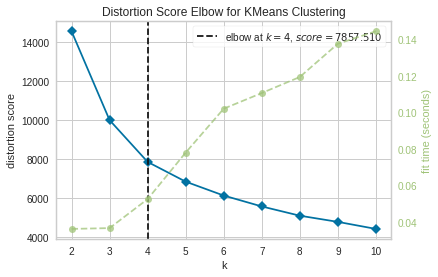

In [ ]:
# Quick examination of elbow method to find numbers of clusters to make.
print('Elbow Method to determine the number of clusters to be formed:')
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(PCA_ds)
Elbow_M.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
#Initiating the Agglomerative Clustering model 
AC = AgglomerativeClustering(n_clusters=4)
# fit model and predict clusters
result_AC = AC.fit_predict(PCA_ds)
PCA_ds["Clusters"] = result_AC
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= result_AC

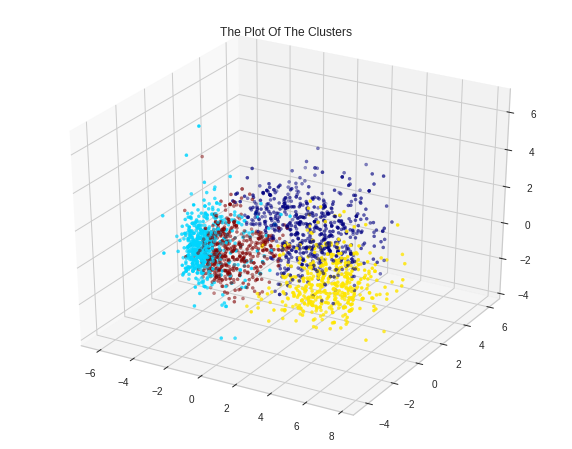

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=10, c=PCA_ds["Clusters"], cmap = 'jet' )
ax.set_title("The Plot Of The Clusters")
plt.show()

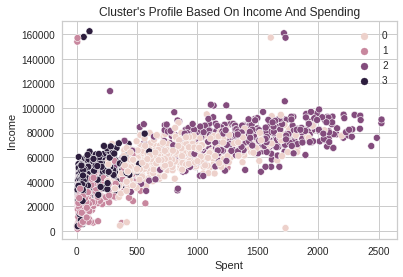

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

### DBSCAN

DBSCAN (Density-Based Spatial Clustering of Applications with Noise) Clustering involves finding high-density areas in the domain and expanding those areas of the feature space around them as clusters.

It is implemented via the DBSCAN class and the main configuration to tune is the “eps” and “min_samples” hyperparameters.

In [ ]:
from sklearn.cluster import DBSCAN
#Initiating the DBSCAN Clustering model 
DBS = DBSCAN(eps=0.60, min_samples=50)
# fit model and predict clusters
result_DBS = DBS.fit_predict(PCA_df)
PCA_ds["Clusters"] = result_DBS
#Adding the Clusters feature to the orignal dataframe.
df["Clusters"]= result_DBS

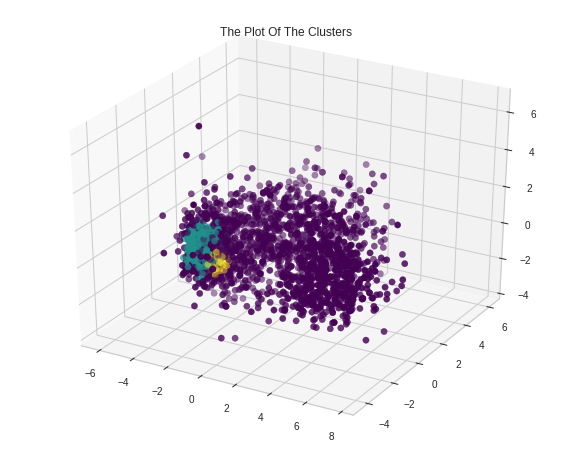

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

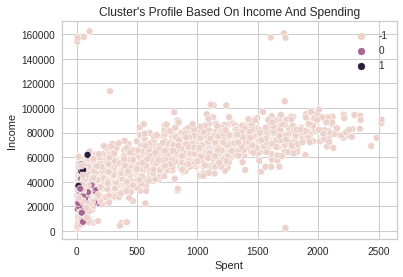

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

**Interesting results:**
It is hard to determine some clusters due to high density, DBSCAN does not show reasonable results. 

## Optimization 

Silhouette method using Silhouette score and plot were applied as an optimization method to determine the optimal number of clusters.

**Steps involved in the Optimization**
* Comparing Silhouette score and plot with the respective number of clusters for DBSCAN and Agglomerative Clustering
* Visualize the optimal clusters formed via scatter plot

Import libraries

In [ ]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.metrics import silhouette_samples
import matplotlib.cm as cm

### Silhouette Method on Agglomerative Clustering

Finding optimal number of clusters for Agglomerative Clustering

For n_clusters = 2 The average silhouette_score is : 0.3966213215879566
For n_clusters = 3 The average silhouette_score is : 0.409252075879086
For n_clusters = 4 The average silhouette_score is : 0.3477245462164512
For n_clusters = 5 The average silhouette_score is : 0.3055519793634699


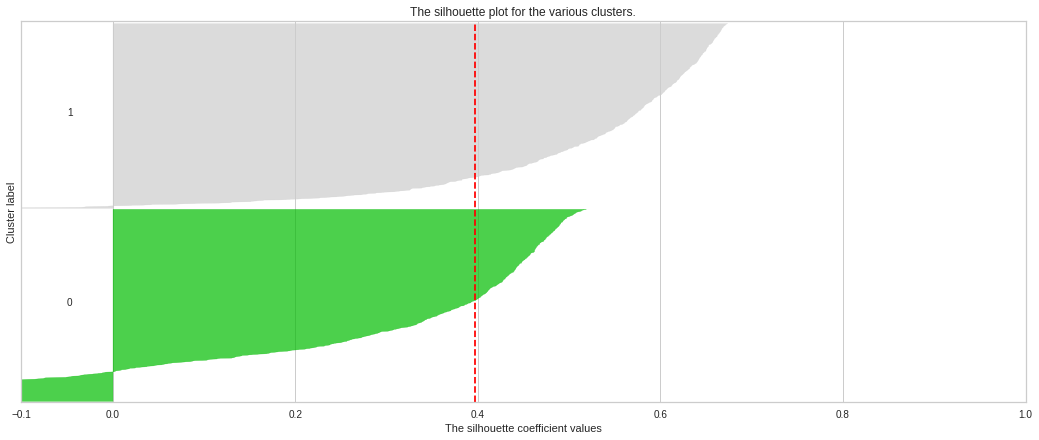

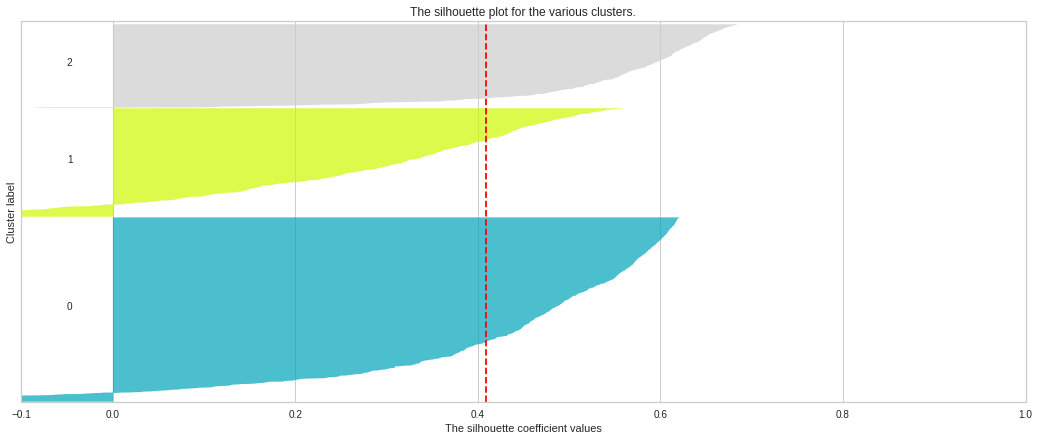

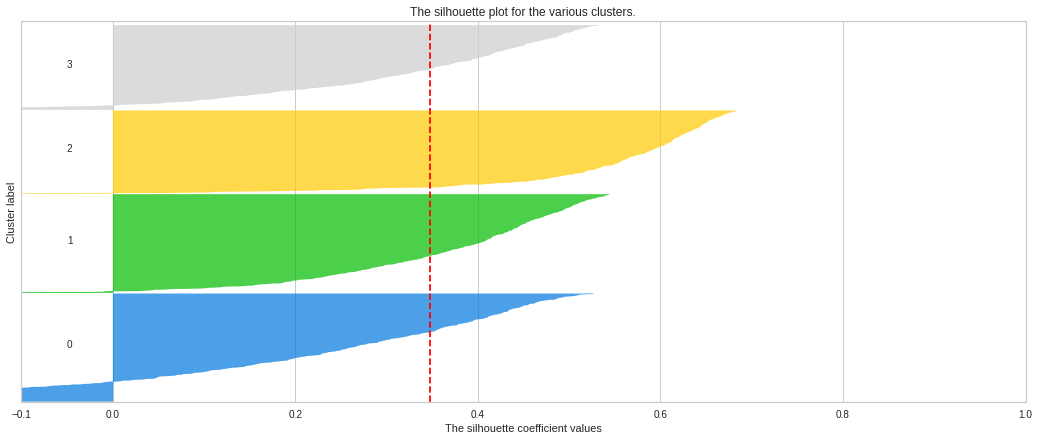

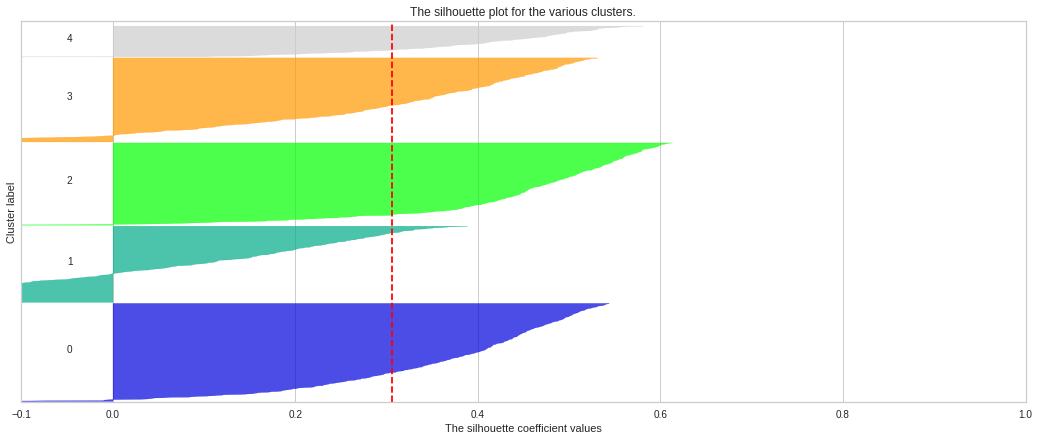

In [ ]:
for n_clusters in range(2,6):
    # Create a subplot 
    fig, (ax1) = plt.subplots(1)
    fig.set_size_inches(18, 7)
 
    # The silhouette coefficient can range from -1, 1 
    ax1.set_xlim([0, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(PCA_df) + (n_clusters) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 5 for reproducibility.
    
    clusterer = AgglomerativeClustering(n_clusters=n_clusters, affinity='euclidean', linkage='ward')
    cluster_labels = clusterer.fit_predict(PCA_df)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(PCA_df, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(PCA_df, cluster_labels)

    y_lower = 5
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i+1) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 5  # 5 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

In [ ]:
AC = AgglomerativeClustering(n_clusters=3)
result_AC = AC.fit_predict(PCA_df)
PCA_ds["Clusters"] = result_AC
df["Clusters"]= result_AC

Model Evaluation for Agglomerative Clustering 

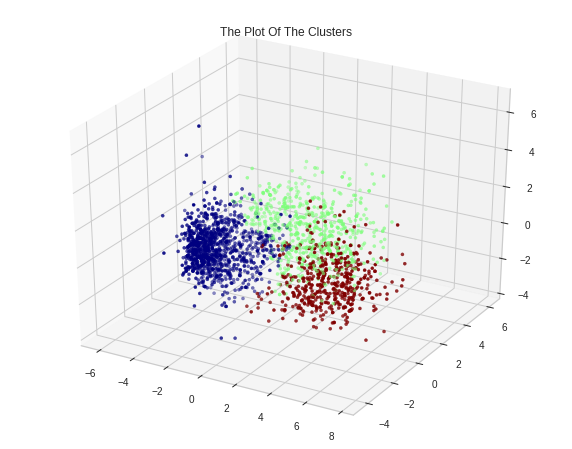

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=10, c=PCA_ds["Clusters"], cmap = 'jet' )
ax.set_title("The Plot Of The Clusters")
plt.show()

### Silhouette method on DBSCAN

In [ ]:
## Finding best values of eps and min_samples
# Defining the list of hyperparameters to try
eps_list=np.arange(start=0.10, stop=0.90, step=0.05)
min_sample_list=np.arange(start=8, stop=13, step=1)
 
# Creating empty data frame to store the silhouette scores for each trials
silhouette_scores_data=pd.DataFrame()
 
for eps_trial in eps_list:
    for min_sample_trial in min_sample_list:
        
        # Generating DBSAN clusters
        db = DBSCAN(eps=eps_trial, min_samples=min_sample_trial)
        
        if(len(np.unique(db.fit_predict(PCA_ds)))>1):
            sil_score=silhouette_score(df, db.fit_predict(PCA_ds))
        else:
            continue
        trial_parameters="eps:" + str(eps_trial.round(1)) +" min_sample :" + str(min_sample_trial)
        
        silhouette_scores_data=silhouette_scores_data.append(pd.DataFrame(data=[[sil_score,trial_parameters]], columns=["score", "parameters"]))
 
# Finding out the best hyperparameters with highest Score
silhouette_scores_data.sort_values(by='score', ascending=False).head()

,score,parameters
0,0.205664,eps:0.9 min_sample :8
0,0.202187,eps:0.8 min_sample :8
0,0.201168,eps:0.9 min_sample :9
0,0.197677,eps:0.9 min_sample :10
0,0.192055,eps:0.9 min_sample :12


In [ ]:
from sklearn.cluster import DBSCAN
#Initiating the DBSCAN Clustering model 
DBS = DBSCAN(eps=0.90, min_samples=8)
# fit model and predict clusters
result_DBS = DBS.fit_predict(PCA_df)
PCA_df["Clusters"] = result_DBS
#Adding the Clusters feature to the orignal dataframe.
df1["Clusters"]= result_DBS

Model Evaluation for DBSCAN

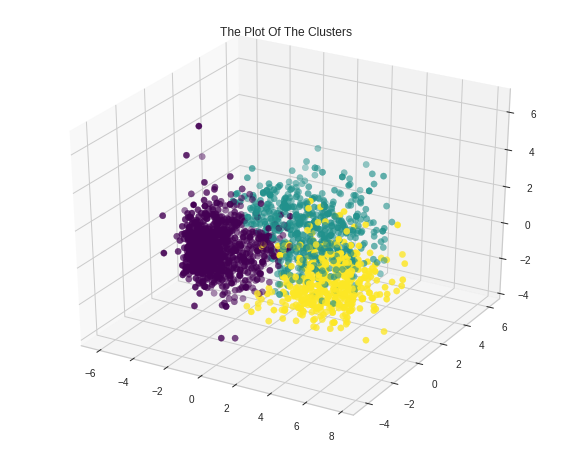

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d', label="bla")
ax.scatter(x, y, z, s=40, c=PCA_ds["Clusters"], marker='o', cmap = 'viridis' )
ax.set_title("The Plot Of The Clusters")
plt.show()

From the optimization, DBCAN model clustering has greatly improved with 3 clusters, however, the Silhouette score is 0.2 which is lower than Agglomerative Clustering of 0.4.

### Discussion

Agglomerative Clustering method has been chosen for discussion as it yielded the highest Silhouette score of 0.4 with 3 clusters.

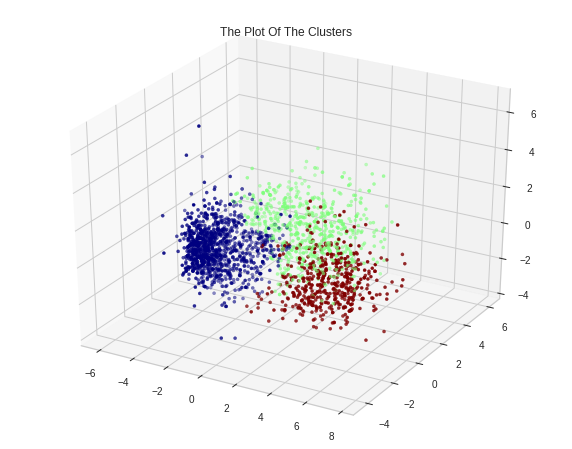

In [ ]:
#Plotting the clusters
fig = plt.figure(figsize=(10,8))
ax = plt.subplot(111, projection='3d')
ax.scatter(x, y, z, s=10, c=PCA_ds["Clusters"], cmap = 'jet' )
ax.set_title("The Plot Of The Clusters")
plt.show()

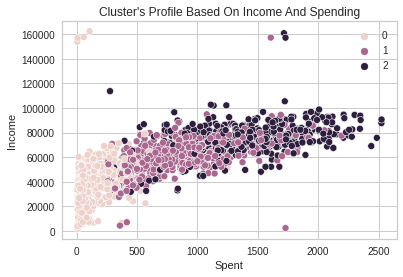

In [ ]:
pl = sns.scatterplot(data = df,x=df["Spent"], y=df["Income"],hue=df["Clusters"])
pl.set_title("Cluster's Profile Based On Income And Spending")
plt.legend()
plt.show()

Income vs spending plot shows the clusters pattern

    group 0: low spending & low income
    group 1: moderate spending & high income
    group 2: high spending & high income


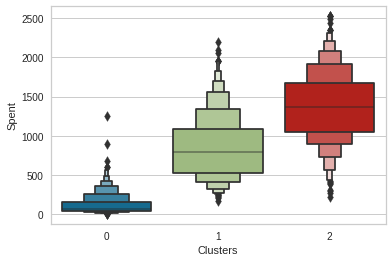

In [ ]:
pl=sns.boxenplot(x=df["Clusters"], y=df["Spent"])
plt.show()

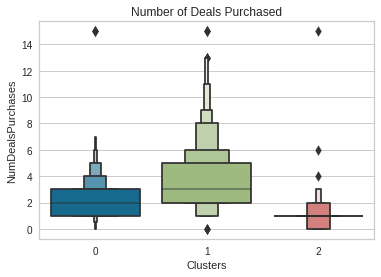

In [ ]:
#Plotting the number of deals purchased

pl=sns.boxenplot(y=df["NumDealsPurchases"],x=df["Clusters"])
pl.set_title("Number of Deals Purchased")
plt.show()

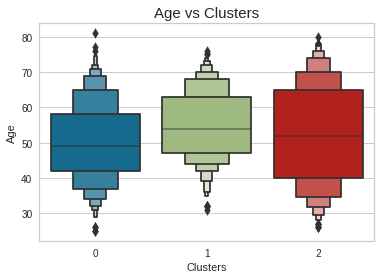

In [ ]:
sns.boxenplot(x=df["Clusters"], y=df["Age"])
plt.title("Age vs Clusters", size=15)
plt.show()

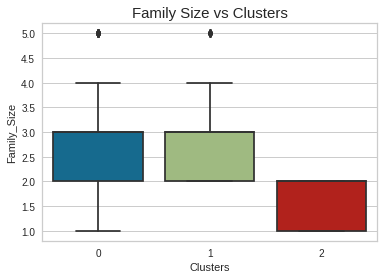

In [ ]:
sns.boxplot(x=df["Clusters"], y=df["Family_Size"])
plt.title("Family Size vs Clusters", size=15)
plt.show()

**Conclusion**

Cluster 0:

    Is youngest cluster
    Has low spending and low income
    Tendency to spend less
    Has least purchase number
    
Cluster 1:

    Is oldest cluster
    Highest deals purchased
    Has moderate spending and high income
    Has less purchase number

Cluster 2:

    Is younger cluster
    Has high spending and high income
    Has high purchase number
    Tendency to spend more
    Has smallest size of family


**Marketing Suggestions**

Cluster 0 makes the least money and spends least money. Therefore, the information about their locations should be located and increase the discount rates at shops located at those locations. Moreover, this is the youngest cluster and the shops situated at those locations should include the products, clothes, etc. suitable for the young people.

Cluster 1 is the oldest cluster, highest number of deals purchased, and has higher family size. Therefore, sales and discounting should be considered for this cluster. In addition to that, if you make the discounts with an event like "Children and Family Day" in shops at those locations where these people live, as they might bring their children to participate, it would possibly increase the number of sales.

Cluster 2 has highest spending and income, they are loyal customers, and thus, providing them referral code that benefits more to new customer they referred, while benefit them some discount to keep this group of customer.
